In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_validate
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Datasets/steel.csv")
data.head()

,normalising_temperature,tempering_temperature,percent_silicon,percent_chromium,percent_copper,percent_nickel,percent_sulphur,percent_carbon,percent_manganese,tensile_strength
0,178.500,275,0.1530,0.970575,0.942,0.8870,0.0,1.920,0.0,25.107613
1,178.500,950,0.1530,1.212726,0.942,0.8870,0.0,1.920,0.0,140.035334
2,178.500,375,0.1530,1.621165,0.942,0.8870,0.0,1.920,0.0,42.217650
3,178.500,900,0.1530,0.809989,0.942,0.8870,0.0,1.920,0.0,95.015309
4,189.525,900,0.1624,1.036229,0.849,0.9382,0.0,2.035,0.0,113.266773


In [3]:
print(data.isnull().sum())

normalising_temperature    0
tempering_temperature      0
percent_silicon            0
percent_chromium           0
percent_copper             0
percent_nickel             0
percent_sulphur            0
percent_carbon             0
percent_manganese          0
tensile_strength           0
dtype: int64


In [4]:
X = data.drop(labels="tensile_strength", axis=1, inplace=False)
y = data["tensile_strength"]

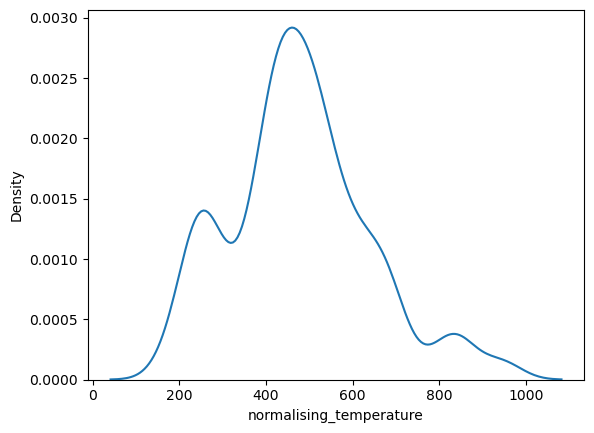

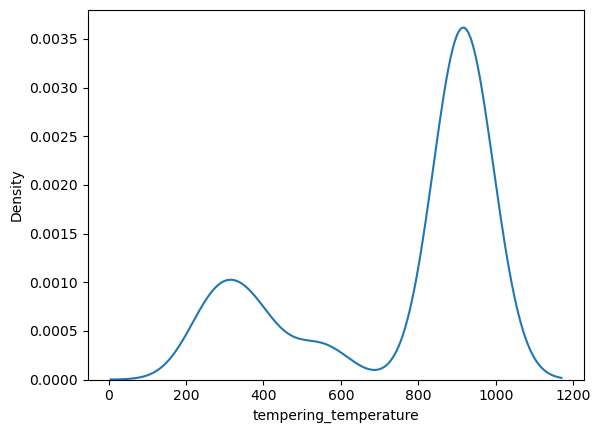

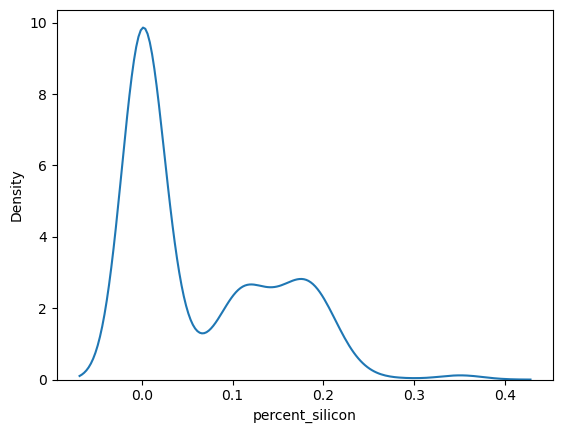

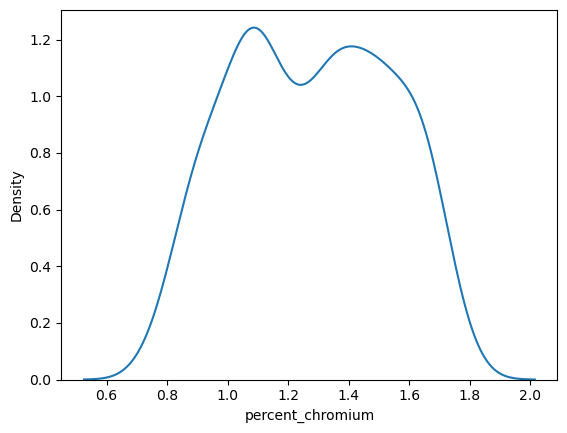

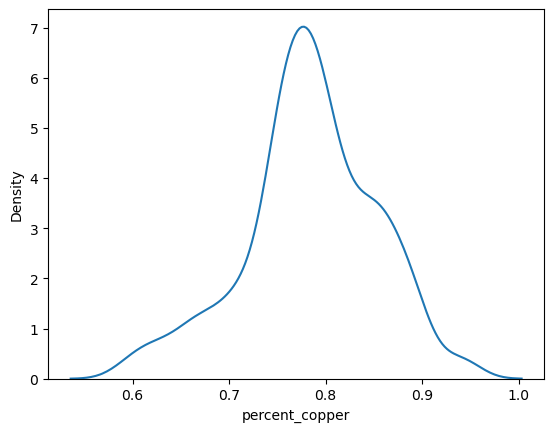

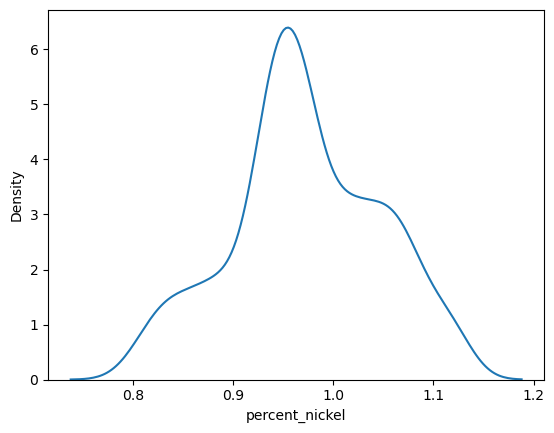

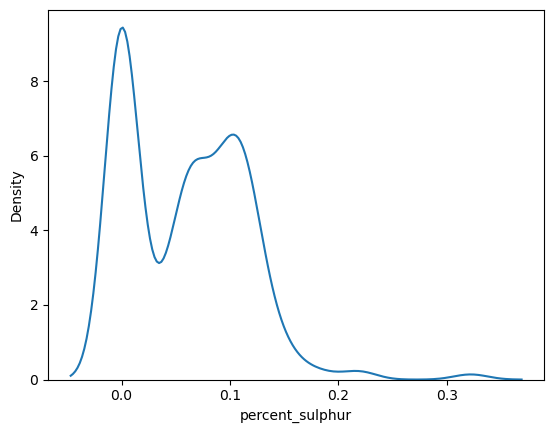

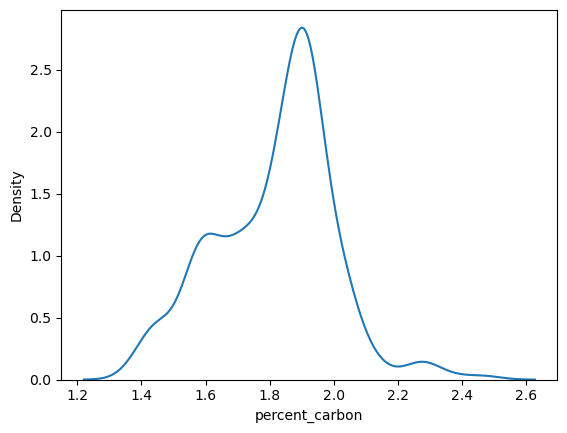

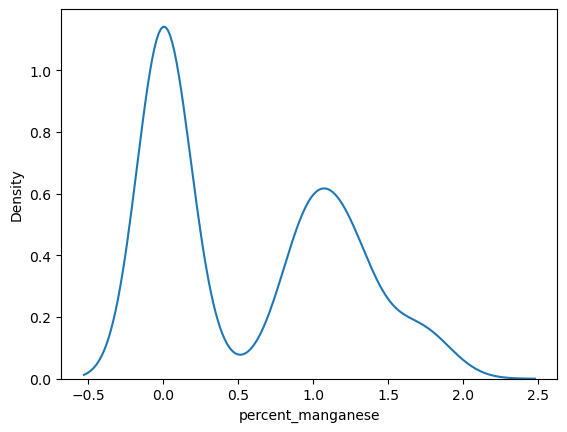

In [14]:
#graph plotting
for col in X.columns:
    sns.kdeplot(X[col])
    plt.show()

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)

(387, 9)
(166, 9)


In [9]:
#Apply train data on 10 fold cross validation on baseline model

#scale the features(X_train,X_test)
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train) 
X_test_scale = scaler.transform(X_test)

cv = KFold(n_splits=10, random_state=42, shuffle=True)
model_SVR = SVR()
scores = cross_validate(model_SVR,X_train_scale, y_train, scoring= {"MSE":"neg_mean_squared_error", "R2":"r2"}, 
                        cv=cv, return_train_score=True,n_jobs=-1)
results_baseline_df = pd.DataFrame(scores)

#change the neg mean square error to positive 
results_baseline_df ['test_MSE']=-results_baseline_df ['test_MSE']
results_baseline_df ['train_MSE']=-results_baseline_df ['train_MSE']
print(results_baseline_df)

   fit_time  score_time     test_MSE    train_MSE   test_R2  train_R2
0  0.004372    0.001881  8382.837926  6480.483250  0.146922  0.199624
1  0.008125    0.003226  4499.509233  6813.235923  0.226805  0.196702
2  0.008243    0.003214  7132.915977  6660.300145  0.159368  0.192722
3  0.004329    0.001884  5561.737362  6621.193171  0.161876  0.208814
4  0.004483    0.003261  7508.339098  6616.875499  0.012069  0.200721
5  0.004406    0.002223  9264.765737  6469.544438  0.124091  0.189512
6  0.007720    0.003335  5089.609126  6774.738045  0.230316  0.199692
7  0.004778    0.001987  7817.934006  6527.885058  0.164381  0.200316
8  0.004634    0.001851  7013.348693  6625.960335  0.102359  0.203524
9  0.005594    0.003282  5771.420985  6701.616010  0.210922  0.199521


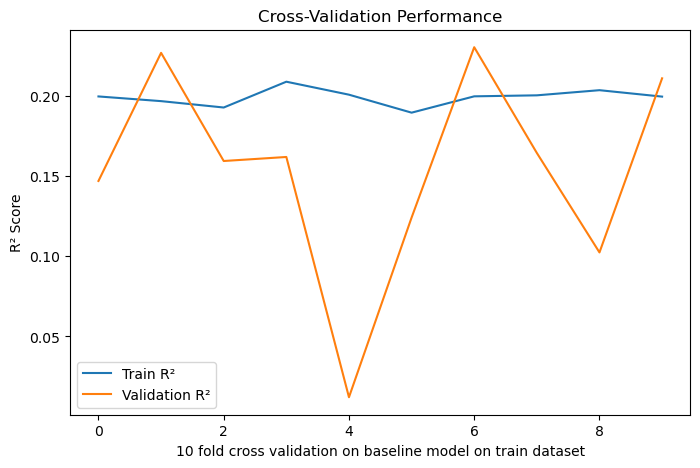

In [18]:
plt.figure(figsize=(8,5))
plt.plot(results_baseline_df['train_R2'], label='Train R²')
plt.plot(results_baseline_df['test_R2'], label='Validation R²')
plt.xlabel('10 fold cross validation on baseline model on train dataset')
plt.ylabel('R² Score')
plt.title('Cross-Validation Performance')
plt.legend()
plt.show()

In [16]:
#Apply test data on 10 fold cross validation on baseline model
cv = KFold(n_splits=10, random_state=42, shuffle=True)
model_SVR = SVR()
scores_test = cross_validate(model_SVR,X_test_scale, y_test, scoring= {"MSE":"neg_mean_squared_error", "R2":"r2"}, 
                        cv=cv, return_train_score=True,n_jobs=-1)
results_baseline_df_test = pd.DataFrame(scores_test)

#change the neg mean square error to positive 
results_baseline_df_test ['test_MSE']=-results_baseline_df_test ['test_MSE']
results_baseline_df_test ['train_MSE']=-results_baseline_df_test ['train_MSE']
print(results_baseline_df_test)

   fit_time  score_time      test_MSE    train_MSE   test_R2  train_R2
0  0.002807    0.002506   5327.850533  8032.677399  0.087969  0.063948
1  0.002950    0.002013  12243.583539  7256.519301 -0.100322  0.080078
2  0.003031    0.002235   7596.424483  7770.746312  0.068105  0.065143
3  0.001691    0.001041   9222.113578  7620.967778  0.082783  0.056501
4  0.003212    0.002136   7164.853486  7804.391180  0.016965  0.073897
5  0.003109    0.002079   6306.544220  7993.615265 -0.150347  0.066865
6  0.002997    0.002042   3745.591697  8172.133504 -0.124099  0.054616
7  0.003196    0.002202   8621.182786  7659.909967  0.048994  0.069275
8  0.002864    0.002003   8995.845214  7617.852500  0.067733  0.067090
9  0.003341    0.001833   9588.020753  7566.122657 -0.079549  0.073517


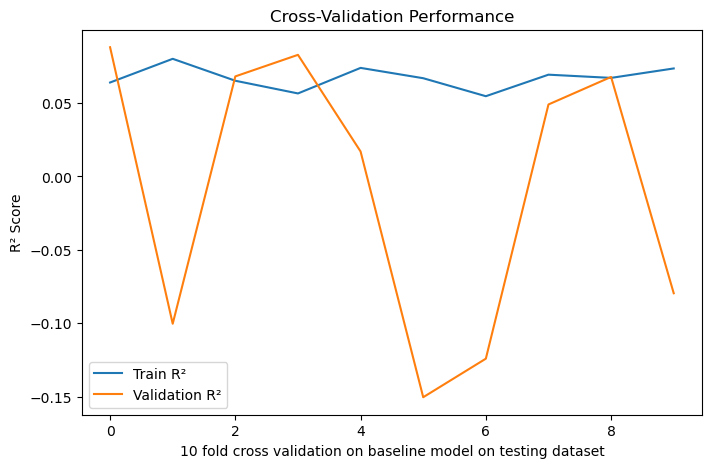

In [19]:
plt.figure(figsize=(8,5))
plt.plot(results_baseline_df_test['train_R2'], label='Train R²')
plt.plot(results_baseline_df_test['test_R2'], label='Validation R²')
plt.xlabel('10 fold cross validation on baseline model on testing dataset')
plt.ylabel('R² Score')
plt.title('Cross-Validation Performance')
plt.legend()
plt.show()

In [11]:
#Hyperparameter tuning
#Define paramater grid 
param_grid ={
    "kernel":["linear","sigmoid","rbf"],
    "epsilon":[0.01, 0.1, 0.5, 1.0]
}

#10 fold cross validation
gs_cv = GridSearchCV(estimator = model_SVR,
                           param_grid=param_grid,
                           scoring = {"MSE":"neg_mean_squared_error", "R2":"r2"},
                           cv=cv,
                           refit="R2",
                           return_train_score=True)

gs_cv.fit(X_train_scale, y_train)
results_df = pd.DataFrame(gs_cv.cv_results_)
#change the neg mean square error to positive 
results_df['mean_test_MSE']=-results_df['mean_test_MSE']

print("Best parameters:", gs_cv.best_params_)
print("Best score:", gs_cv.best_score_)
print(results_df[['param_kernel', 'param_epsilon', 'mean_test_MSE', 'mean_test_R2']])

Best parameters: {'epsilon': 0.1, 'kernel': 'linear'}
Best score: 0.7479212610850856
   param_kernel  param_epsilon  mean_test_MSE  mean_test_R2
0        linear           0.01    2005.750747      0.747842
1       sigmoid           0.01    5096.382161      0.367074
2           rbf           0.01    6804.967965      0.153842
3        linear           0.10    2005.077607      0.747921
4       sigmoid           0.10    5097.181444      0.366944
5           rbf           0.10    6804.241814      0.153911
6        linear           0.50    2008.897605      0.747492
7       sigmoid           0.50    5090.512754      0.367772
8           rbf           0.50    6799.955969      0.154327
9        linear           1.00    2010.847549      0.747379
10      sigmoid           1.00    5084.251042      0.368425
11          rbf           1.00    6793.192357      0.154990


In [ ]:
model_MLPR = MLPRegressor()

scores_MLPR = cross_validate(model_MLPR,X_train, y_train, scoring= {"MSE":"neg_mean_squared_error", "R2":"r2"}, 
                        cv=cv, return_train_score=True,n_jobs=-1)

results_baseline_df_MLPR = pd.DataFrame(scores)

#change the neg mean square error to positive 
results_baseline_df_MLPR ['test_MSE']=-results_baseline_df_MLPR ['test_MSE']
results_baseline_df_MLPR ['train_MSE']=-results_baseline_df_MLPR ['train_MSE']
print(results_baseline_df_MLPR)